<a href="https://colab.research.google.com/github/Yogireddy1176/SE-LAB-2/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
machine_failure_data = pd.read_csv('/content/Machine_failure data.csv')
machine_failure_data

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0
...,...,...,...,...,...,...,...,...,...,...
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1


In [ ]:
print(machine_failure_data.shape)
print(machine_failure_data.ndim)

(944, 10)
2


In [ ]:
machine_failure_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


In [ ]:
print(machine_failure_data.isnull().sum())

footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64


In [ ]:
machine_failure_data.describe(include="all")

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


In [ ]:
machine_failure_data.columns

Index(['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP',
       'Temperature', 'fail'],
      dtype='object')

## Failure Distribution

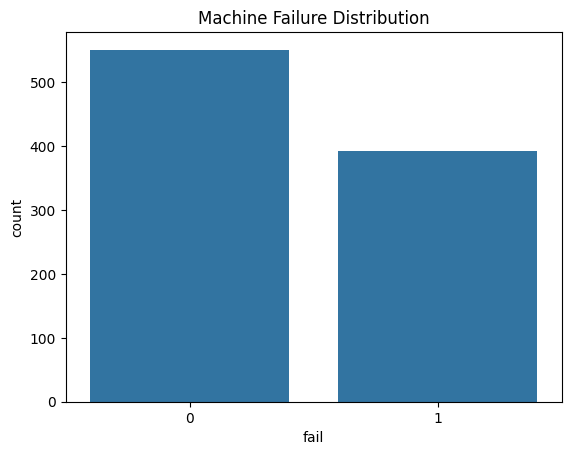

In [ ]:
sns.countplot(x='fail', data=machine_failure_data)
plt.title("Machine Failure Distribution")
plt.show()

### Correlation Heatmap

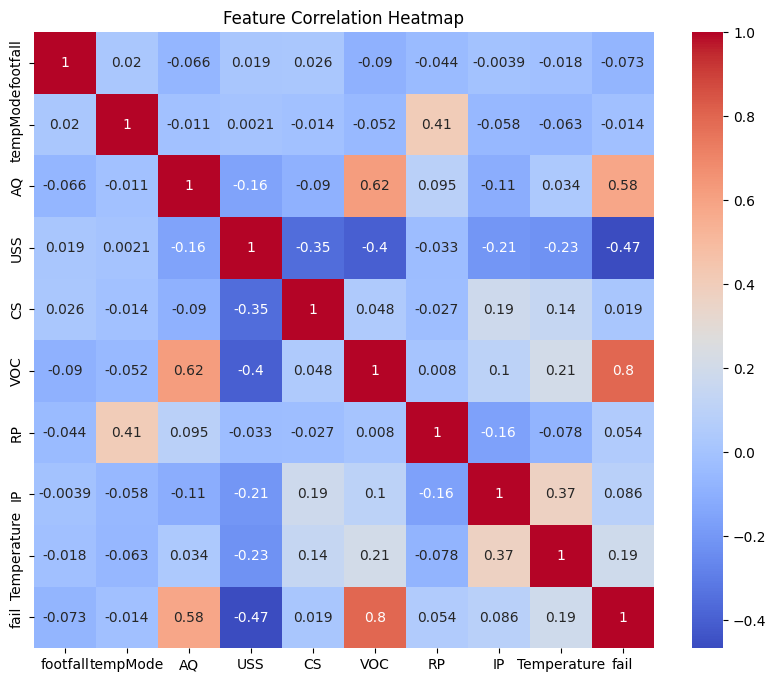

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(machine_failure_data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

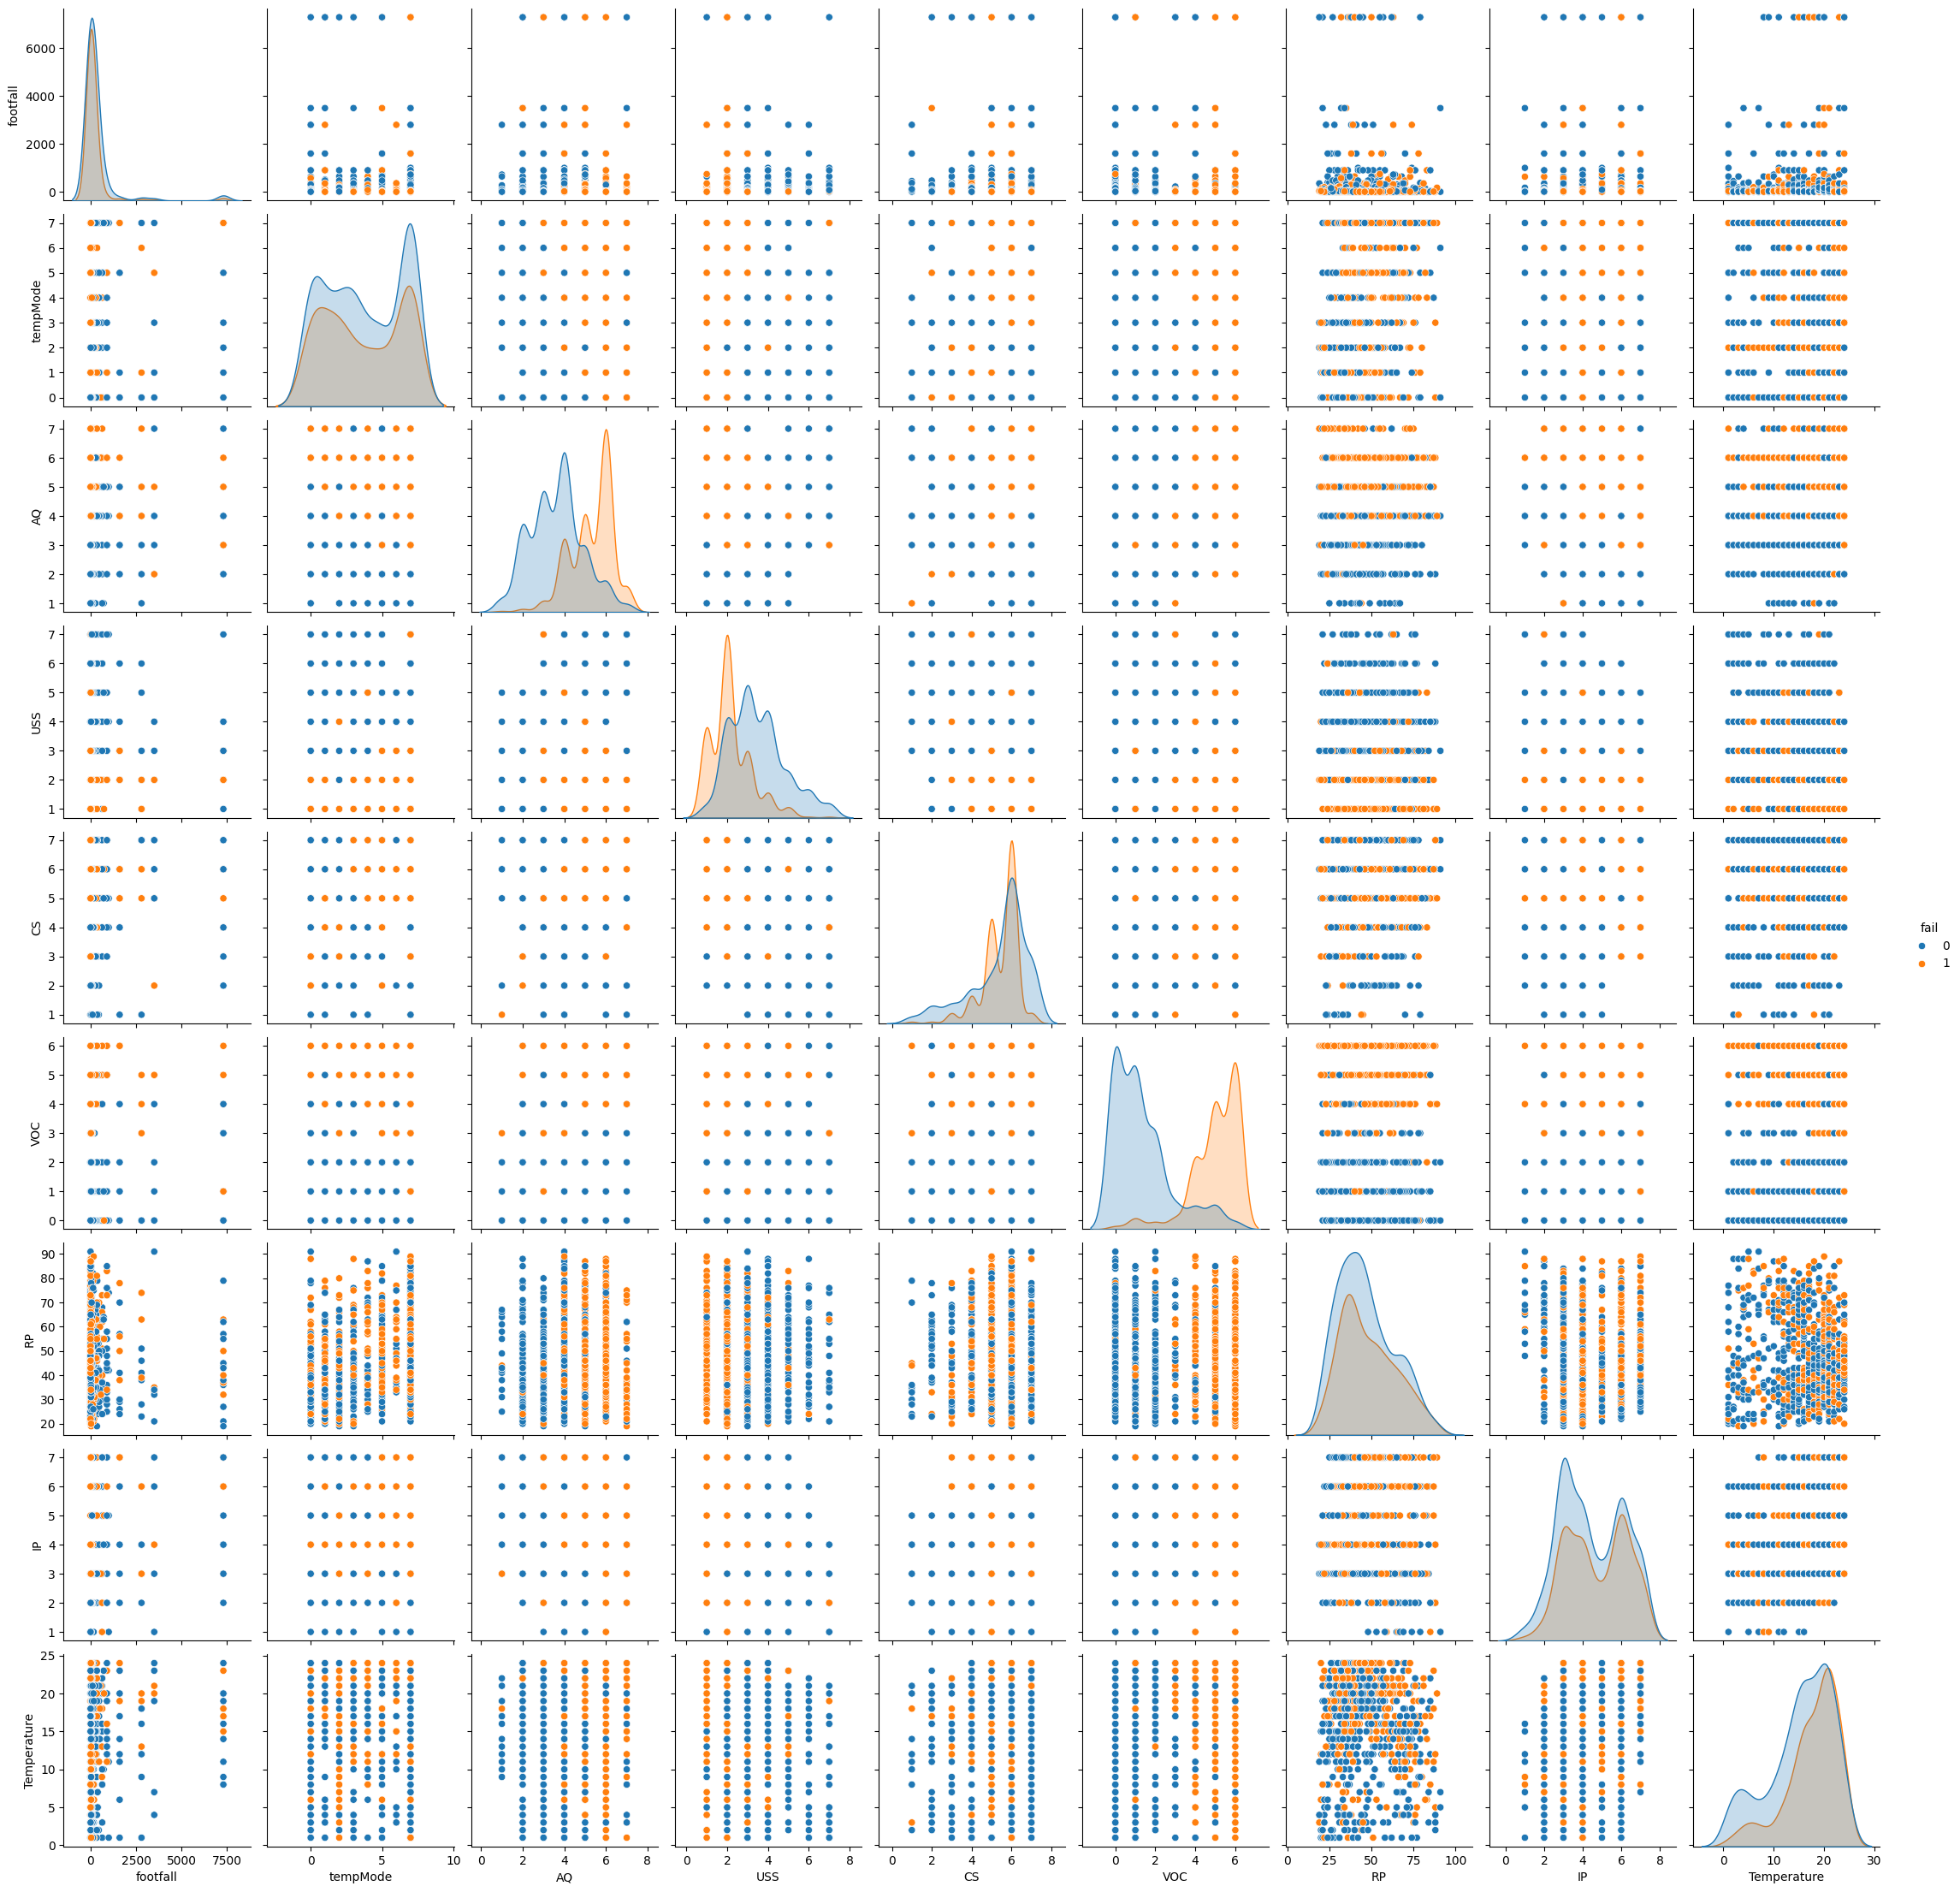

In [ ]:
sns.pairplot(machine_failure_data, hue='fail')
plt.show()

In [ ]:
machine_failure_data_corr = machine_failure_data.corr()

In [ ]:
machine_failure_data_corr = machine_failure_data.corr()
print(machine_failure_data_corr["Temperature"])

footfall      -0.018009
tempMode      -0.062568
AQ             0.034328
USS           -0.225122
CS             0.143972
VOC            0.208956
RP            -0.078499
IP             0.372771
Temperature    1.000000
fail           0.190257
Name: Temperature, dtype: float64


In [ ]:
if machine_failure_data['tempMode'].dtype == 'object':
    machine_failure_data = pd.get_dummies(machine_failure_data, columns=['tempMode'], drop_first=True)

In [ ]:
X = machine_failure_data.drop('fail', axis=1)
y = machine_failure_data['fail']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(755, 9)

(189, 9)

(755,)

(189,)

In [ ]:
print(X_train)
print(y_train)

     footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature
658         9         6   2    2   6    0  33   5           20
837        29         2   6    2   5    6  49   6           23
6         100         7   5    6   4    1  77   4            1
801       220         2   4    2   6    6  31   6           22
722         3         5   5    1   6    5  52   7           21
..        ...       ...  ..  ...  ..  ...  ..  ..          ...
484         5         5   5    5   4    1  61   3           18
301       110         5   6    1   6    6  60   7           15
813         9         4   6    2   6    5  66   6           22
820         0         6   5    2   6    5  39   7           22
802         0         1   7    2   6    6  45   4           22

[755 rows x 9 columns]
658    0
837    1
6      0
801    1
722    1
      ..
484    0
301    1
813    1
820    1
802    1
Name: fail, Length: 755, dtype: int64


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [ ]:
print(y_pred)
print(y_test)

[1 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1
 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0
 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0
 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1
 0 1 1 0]
309    1
747    0
758    0
688    0
313    0
      ..
258    1
929    0
489    1
655    0
268    0
Name: fail, Length: 189, dtype: int64


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9259259259259259

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       110
           1       0.90      0.92      0.91        79

    accuracy                           0.93       189
   macro avg       0.92      0.93      0.92       189
weighted avg       0.93      0.93      0.93       189


Confusion Matrix:
 [[102   8]
 [  6  73]]


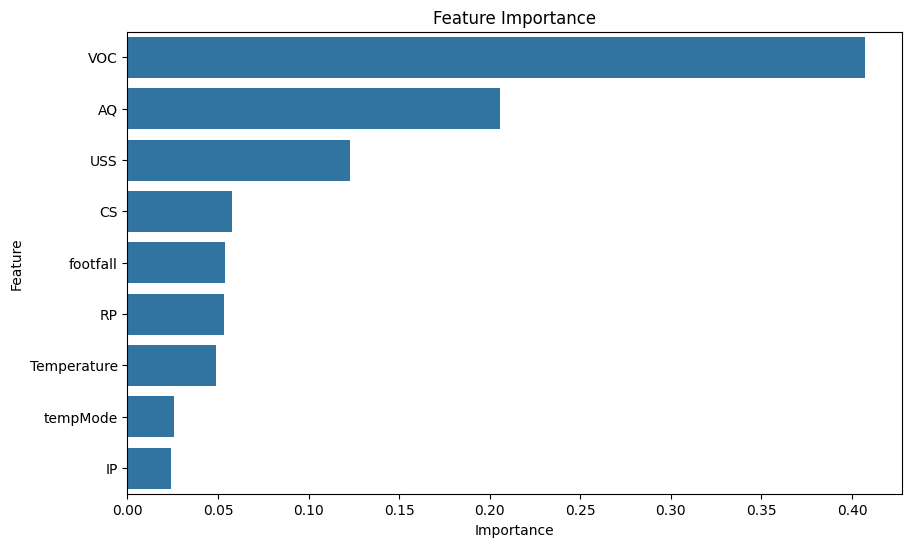

In [ ]:
importances = model.feature_importances_
features = X.columns

feature_machine_failure_data = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_machine_failure_data = feature_machine_failure_data.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_machine_failure_data)
plt.title("Feature Importance")
plt.show()